In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
wine_qouality=pd.read_csv('C:\\Users\\Farnaz javan pour\\Desktop\\dataset\\wine_qouality\\Wine-Quality-master\\winequality-red.csv')
wine_qouality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_qouality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_qouality['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

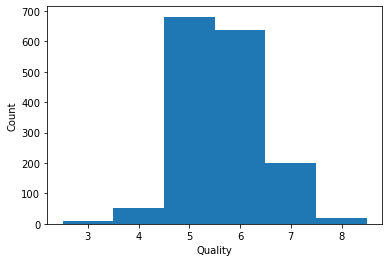

In [5]:
def plot_wine_quality_histogram(quality):
    unique_vals=wine_qouality['quality'].sort_values().unique()
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.hist(quality.values,bins=np.append(unique_vals,9),align='left')
plot_wine_quality_histogram(wine_qouality['quality'])

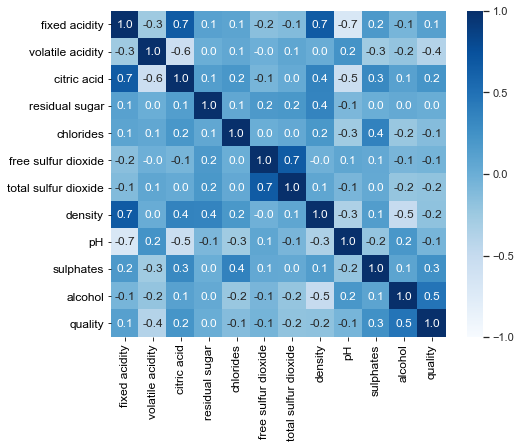

In [6]:
def plot_features_correlation(wine_qouality):
    plt.figure(figsize=(7.5,6))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.set(font_scale=1)
    corr_mat = wine_qouality.corr()
    ax = sns.heatmap(data=corr_mat, annot=True, fmt='0.1f', vmin=-1.0, vmax=1.0, center=0.0, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, cmap="Blues")
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
plot_features_correlation(wine_qouality)

In [7]:
y = wine_qouality.quality
X = wine_qouality.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
def scores_results(y_train, y_test, y_pred_train, y_pred_test):
    #this function will provide us with accuracy and mse scores for training and test sets
    y_pred_train_round = np.round(y_pred_train)
    y_pred_test_round = np.round(y_pred_test)
    accuracy = [accuracy_score(y_train, y_pred_train_round), accuracy_score(y_test, y_pred_test_round)]
    mse_with_rounding = [mean_squared_error(y_train, y_pred_train_round), mean_squared_error(y_test, y_pred_test_round)]
    results = pd.DataFrame(list(zip(accuracy, mse_with_rounding)), columns = ['accuracy score', 'mse (after rounding)'], index = ['train', 'test'])
    return results

def baseline(X_train_scaled, X_test_scaled, y_train, y_test):
    #dummy regressor which always predicts the mean of the dataset
    from sklearn.dummy import DummyRegressor
    baseline = DummyRegressor(strategy='mean')
    baseline.fit(X_train_scaled, y_train)
    y_pred_train = baseline.predict(X_train_scaled)
    y_pred_test = baseline.predict(X_test_scaled)
    return scores_results(y_train, y_test, y_pred_train, y_pred_test)

baseline(X_train_scaled, X_test_scaled, y_train, y_test)

,accuracy score,mse (after rounding)
train,0.398749,0.784988
test,0.400000,0.781250


In [10]:
def linear_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    #basic linear regression
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(X_train_scaled,y_train)
    y_pred_train=lm.predict(X_train_scaled)
    y_pred_test=lm.predict(X_test_scaled)
    metric_lr=[accuracy_score(y_test,np.round(y_pred_test)),mean_squared_error(y_test,y_pred_test),r2_score(y_test,y_pred_test)]
    return scores_results(y_train, y_test, y_pred_train, y_pred_test)

linear_reg(X_train_scaled, X_test_scaled, y_train, y_test)

,accuracy score,mse (after rounding)
train,0.587959,0.505082
test,0.628125,0.462500


In [11]:
def lasso_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.linear_model import LassoCV
    n_alphas = 5000
    alpha_vals = np.logspace(-6, 0, n_alphas)
    lr = LassoCV(alphas=alpha_vals, cv=10, random_state=0)
    lr.fit(X_train_scaled, y_train)
    y_pred_train = lr.predict(X_train_scaled)
    y_pred_test = lr.predict(X_test_scaled)
    metrics_lasso = [accuracy_score(y_test, np.round(y_pred_test)), mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test)]
    return metrics_lasso

In [12]:
def elastic_net_reg(X_train_scaled, X_test_scaled, y_train, y_test):
         from sklearn.linear_model import ElasticNetCV
         n_alpha=300
         l1_ratio=[.1,.3,.5,.7,.9]
         rr=ElasticNetCV(n_alphas=n_alpha,l1_ratio=l1_ratio,cv=10,random_state=0)
         rr.fit(X_train_scaled,y_train)
         y_pred_train=rr.predict(X_train_scaled)
         y_pred_test=rr.predict(X_test_scaled)
         metric_en=[accuracy_score(y_test,np.round(y_pred_test)),mean_squared_error(y_test, y_pred_test),r2_score(y_test, y_pred_test)]
         return metric_en
        

In [13]:
def ridge_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.linear_model import RidgeCV
    n_alphas = 100
    alpha_vals = np.logspace(-1, 3, n_alphas)
    rr = RidgeCV(alphas=alpha_vals, cv=10)
    rr.fit(X_train_scaled, y_train)
    y_pred_train = rr.predict(X_train_scaled)
    y_pred_test = rr.predict(X_test_scaled)
    metrics_ridge = [accuracy_score(y_test, np.round(y_pred_test)), mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test)]
    return metrics_ridge

In [16]:
metrics_lr=linear_reg(X_train_scaled, X_test_scaled, y_train, y_test)
metrics_lasso = lasso_reg(X_train_scaled, X_test_scaled, y_train, y_test)
metrics_en = elastic_net_reg(X_train_scaled, X_test_scaled, y_train, y_test)
metrics_ridge = ridge_reg(X_train_scaled, X_test_scaled, y_train, y_test)
finalscores = pd.DataFrame(list(zip( metrics_lasso, metrics_en, metrics_ridge)), columns = ['lasso', 'el net', 'ridge'], index = ['acc','mse','r2'])
finalscores

,lasso,el net,ridge
acc,0.628125,0.628125,0.625000
mse,0.400986,0.399993,0.400429
r2,0.378580,0.380119,0.379442


In [17]:
from sklearn.preprocessing import PolynomialFeatures
X_deg2 = PolynomialFeatures(degree=2).fit_transform(X) #this has now 78 feautures
X_deg3 = PolynomialFeatures(degree=3).fit_transform(X) #this has now 170 features

X_train_deg2, X_test_deg2, y_train_deg2, y_test_deg2 = train_test_split(X_deg2, y, test_size=0.2, random_state=0, stratify=y)
X_train_deg3, X_test_deg3, y_train_deg3, y_test_deg3 = train_test_split(X_deg3, y, test_size=0.2, random_state=0, stratify=y)

scaler_deg2 = preprocessing.StandardScaler().fit(X_train_deg2)
scaler_deg3 = preprocessing.StandardScaler().fit(X_train_deg3)

X_train_scaled_deg2 = scaler_deg2.transform(X_train_deg2)
X_train_scaled_deg3 = scaler_deg3.transform(X_train_deg3)

X_test_scaled_deg2 = scaler_deg2.transform(X_test_deg2)
X_test_scaled_deg3 = scaler_deg3.transform(X_test_deg3)

In [18]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning) #this is just to disable some anoying warnings that sklearn forces to always come up

metric_lasso=lasso_reg(X_train_scaled_deg2 ,X_test_scaled_deg2, y_train_deg2, y_test_deg2 )
metric_elas=elastic_net_reg(X_train_scaled_deg2 ,X_test_scaled_deg2, y_train_deg2, y_test_deg2)
metric_ridge=ridge_reg(X_train_scaled_deg2 ,X_test_scaled_deg2, y_train_deg2, y_test_deg2)

final_score=pd.DataFrame(list(zip(metric_lasso,metric_elas,metric_ridge)),columns=['lasso','elastic','ridge'],index = ['acc','mse','r2'])
final_score



,lasso,elastic,ridge
acc,0.637500,0.650000,0.650000
mse,0.383451,0.384568,0.384121
r2,0.405754,0.404024,0.404717


In [20]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning) #this is just to disable some anoying warnings that sklearn forces to always come up


metric_lasso=lasso_reg(X_train_scaled_deg3,X_test_scaled_deg3, y_train_deg3, y_test_deg3)
metric_elas=elastic_net(X_train_scaled_deg3, X_test_scaled_deg3, y_train_deg3, y_test_deg3)
metric_ridge=ridge_reg(X_train_scaled_deg3, X_test_scaled_deg3, y_train_deg3, y_test_deg3)

final_score=pd.DataFrame(list(zip(metric_lasso,metric_elas,metric_ridge)),columns=['lasso','elastic','ridge'],index = ['acc','mse','r2'])

final_score

KeyboardInterrupt: 

In [26]:
def svm_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.svm import SVR
    parameters = [{'C': [0.1, 1, 10],
                   'epsilon': [0.01, 0.1],
                    'gamma': [0.01, 0.1, 0.3, 0.5, 1]}]
    clf2=SVR(kernel='rbf')
    clf=GridSearchCV(clf2,parameters,cv=10)
    clf.fit(X_train_scaled,y_train)
    y_pred_train=clf.predict(X_train_scaled)
    y_pred_test=clf.predict(X_test_scaled)
    best_parameters=clf.best_params_
    print('best parameters',best_parameters)
    return scores_results(y_train, y_test, y_pred_train, y_pred_test)

svm_reg(X_train_scaled, X_test_scaled, y_train, y_test)

best parameters {'C': 1, 'epsilon': 0.01, 'gamma': 0.1}


,accuracy score,mse (after rounding)
train,0.696638,0.366693
test,0.646875,0.465625


In [28]:
def nn_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.neural_network import MLPRegressor
    parameters=[{'hidden_layer_sizes': [3, 5, 10],
                'alpha':[0.01,1,10,100],
                'activation':['relu','logistic','tanh','identify']}]
    
    nn=MLPRegressor(solver='lbfgs',random_state=0)
    nn=GridSearchCV(nn,parameters,cv=10)
    nn.fit(X_train_scaled, y_train)
    y_pred_train=nn.predict(X_train_scaled)
    y_pred_test=nn.predict(X_test_scaled)
    
    best_parameters=nn.best_params_
    print('best parameters',best_parameters)
    return scores_results(y_train, y_test, y_pred_train, y_pred_test)



nn_reg(X_train_scaled, X_test_scaled, y_train, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 641, in fit
    return self._fit(X, y, incremental=False)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 321, in _fit
    self._validate_hyperparameters()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 419, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not supported. Supported "
ValueError: The activation 'identify' is no

best parameters {'activation': 'tanh', 'alpha': 10, 'hidden_layer_sizes': 10}


,accuracy score,mse (after rounding)
train,0.619234,0.443315
test,0.653125,0.421875
